<a href="https://colab.research.google.com/github/Sabrina-Hendricks/assignment2/blob/main/SabrinaViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [5]:
df = pd.read_csv('/content/df_cleaned.csv')

In [6]:
df.head()

,RELIG,CHILDS,AGEKDBRN,EDUC,HAPPY,ATTEND,GOD,INCOME16,FAMGEN,RELIG16,RELITEN,DEGREE,AGE,SEX,RACE,MARITAL,POLVIEWS,HRS1
0,CHRISTIAN,0.0,NaN,14.0,2.0,2-3 times a month,6.0,NaN,1.0,PROTESTANT,Strong,Associate/junior college,43.0,1.0,1.0,5.0,6.0,NaN
1,CATHOLIC,3.0,21.0,10.0,1.0,About once or twice a year,6.0,16.0,2.0,CATHOLIC,Strong,High school,74.0,2.0,1.0,4.0,NaN,NaN
2,NONE,2.0,35.0,16.0,1.0,About once or twice a year,5.0,25.0,2.0,CATHOLIC,No religion,Bachelor's,42.0,1.0,1.0,1.0,5.0,40.0
3,PROTESTANT,2.0,32.0,16.0,1.0,Nearly every week,6.0,26.0,1.0,CATHOLIC,Strong,Bachelor's,63.0,2.0,1.0,1.0,4.0,40.0
4,CATHOLIC,0.0,NaN,18.0,2.0,Several times a week,6.0,26.0,1.0,CATHOLIC,Strong,Graduate,71.0,1.0,2.0,3.0,7.0,NaN


# Religion and Income

In [26]:
income_stats = df.groupby('RELIG')['INCOME16'].describe()
income_stats

,count,mean,std,min,25%,50%,75%,max
RELIG,,,,,,,,
BUDDHISM,16.0,19.687500,4.571196,12.0,17.25,19.0,23.50,26.0
CATHOLIC,446.0,18.228700,6.022555,1.0,16.00,19.5,22.00,26.0
CHRISTIAN,26.0,17.384615,5.261763,8.0,13.25,17.0,20.00,26.0
HINDUISM,7.0,14.428571,6.876461,2.0,12.00,14.0,19.50,22.0
INTER-NONDENOMINATIONAL,1.0,20.000000,NaN,20.0,20.00,20.0,20.00,20.0
JEWISH,36.0,20.861111,5.565982,2.0,20.00,22.0,25.25,26.0
MUSLIM/ISLAM,14.0,14.571429,7.132960,1.0,9.00,15.5,19.75,26.0
NAN,11.0,18.363636,4.780643,11.0,16.50,18.0,21.50,26.0
NATIVE AMERICAN,1.0,18.000000,NaN,18.0,18.00,18.0,18.00,18.0


- Jewish and Orthodox Christians have the highest mean income.
- Other Eastern religions have the lowest mean, but there is only one person so that's probably not accurate.
- Islam as the greatest distribution of income, followed by Hinduism.
- Catholic/Christian/Protestant are all comparably similar in their mean income range.

In [14]:
#Adding a new column with the income range for easier interpretation

income_mapping = {
    5: '$5,000 to $5,999',
    6: '$6,000 to $6,999',
    7: '$7,000 to $7,999',
    8: '$8,000 to $9,999',
    9: '$10,000 to $12,499',
    10: '$12,500 to $14,999',
    11: '$15,000 to $17,499',
    12: '$17,500 to $19,999',
    13: '$20,000 to $22,499',
    14: '$22,500 to $24,999',
    15: '$25,000 to $29,999',
    16: '$30,000 to $34,999',
    17: '$35,000 to $39,999',
    18: '$40,000 to $49,999',
    19: '$50,000 to $59,999',
    20: '$60,000 to $74,999',
    21: '$75,000 to $89,999',
    22: '$90,000 to $109,999',
    23: '$110,000 to $129,999',
    24: '$130,000 to $149,999',
    25: '$150,000 to $169,999',
    26: '$170,000 or Over'
}

df['INCOME_RANGE'] = df['INCOME16'].map(income_mapping)

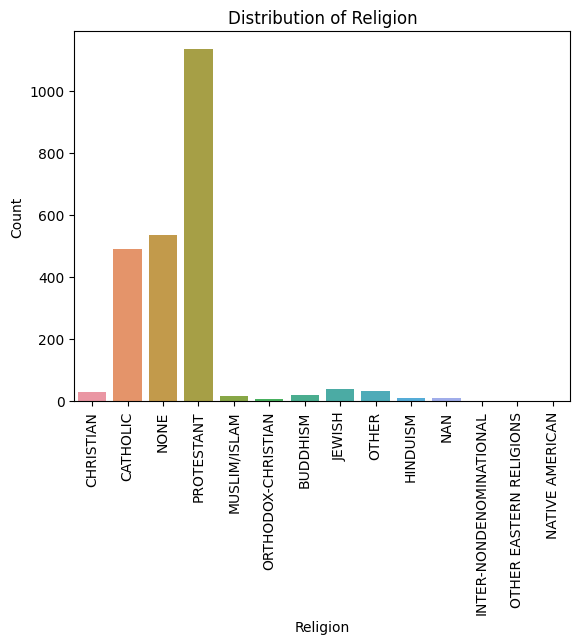

In [11]:
sns.countplot(x='RELIG', data=df)
plt.xlabel('Religion')
plt.ylabel('Count')
plt.title('Distribution of Religion')
plt.xticks(rotation=90)
plt.show()

Most people are Protestant in our dataset

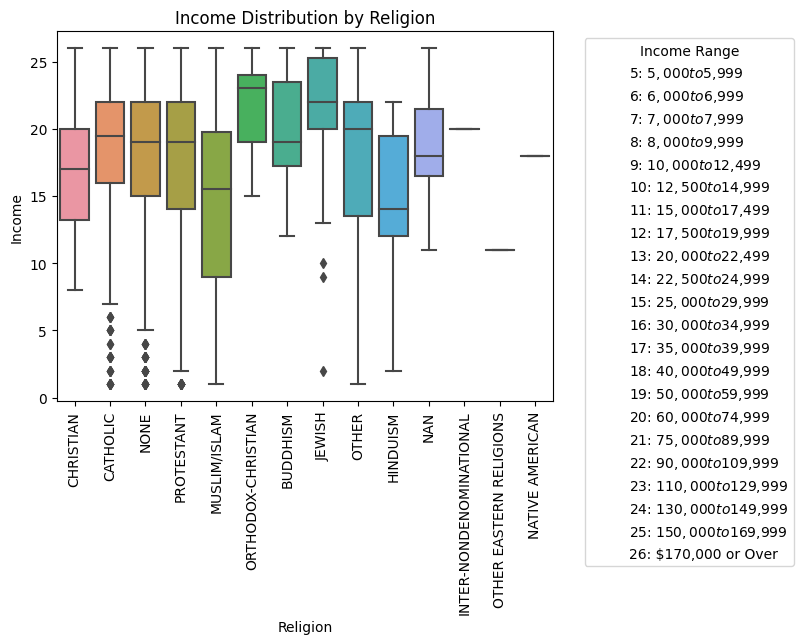

In [22]:
# Create a box plot with a legend
sns.boxplot(x='RELIG', y='INCOME16', data=df)
plt.xlabel('Religion')
plt.ylabel('Income')
plt.title('Income Distribution by Religion')
# Create custom legend items without markers
legend_elements = [Line2D([0], [0], color='white', marker='', markersize=0, label=f"{value}: {label}") for value, label in income_mapping.items()]
# Add a legend manually
plt.legend(handles=legend_elements, title='Income Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

Jewish people are generally the most wealthy, with Orthodox Christians and Buddhists not far behind. Islam has the largest distribution of income ranges.

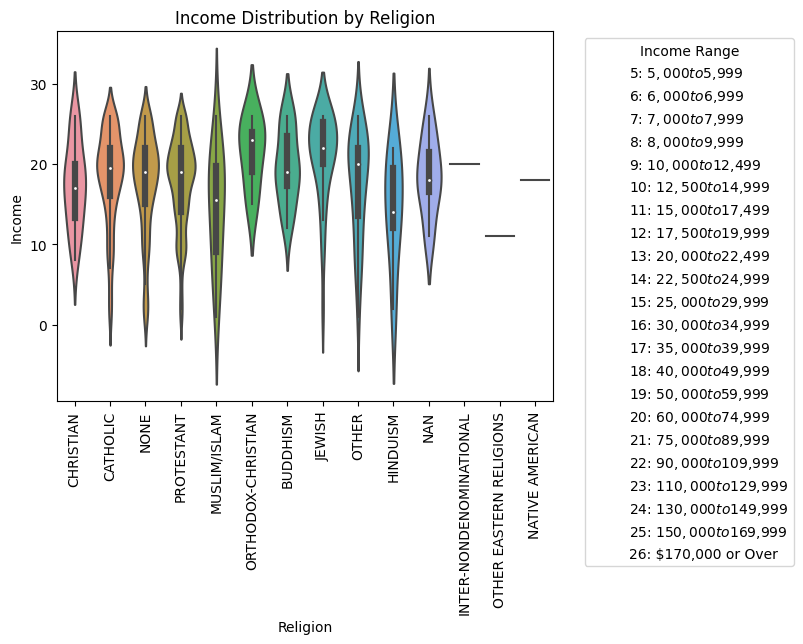

In [24]:
sns.violinplot(x='RELIG', y='INCOME16', data=df)
plt.xlabel('Religion')
plt.ylabel('Income')
plt.title('Income Distribution by Religion')
legend_elements = [Line2D([0], [0], color='white', marker='', markersize=0, label=f"{value}: {label}") for value, label in income_mapping.items()]
plt.legend(handles=legend_elements, title='Income Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

Islam has the largest distribution of income ranges. Hindus also have a large distribution. Orthodox Christians have the highest median income, demonstrated by the white dots in the violin plots. Jewish people have the highest probability to be making at least above $60,000 per year based on the width of their violin at that income range. Christianity and their various sects seem pretty equal in income distribution.  

**Overall results for income vs. religion**

Familes who are Jewish and Orthodox Christian, on average, have the highest family income range. This is represented by the summary statistics and boxplots. *It should be noted that there are many less respondents for these two religions as there are for Catholic, Christian, and Protestant religions, so that might skew the data.* Islam has the greatest distribution of income, demonstrated by its high standard deviation and range in both the boxplot and violin plot. Catholic, Christian, and Protestant families seem to fall in similar income ranges.

# Religion and Family Generations

In [27]:
income_stats_by_famgen = df.groupby('FAMGEN')['INCOME16'].describe()
income_stats_by_famgen

,count,mean,std,min,25%,50%,75%,max
FAMGEN,,,,,,,,
1.0,1355.0,17.458303,5.959885,1.0,14.0,19.0,22.0,26.0
2.0,679.0,18.366716,5.716210,1.0,16.0,19.0,22.0,26.0
3.0,25.0,18.640000,5.345403,1.0,17.0,19.0,23.0,26.0
4.0,16.0,14.062500,6.747530,1.0,9.5,14.5,20.0,23.0
5.0,47.0,17.638298,7.399840,1.0,13.5,20.0,24.0,26.0
6.0,25.0,18.080000,5.007661,6.0,15.0,20.0,22.0,26.0
7.0,1.0,13.000000,NaN,13.0,13.0,13.0,13.0,13.0


- 3 family generations has the highest mean income
- 7 family generations has the lowest mean income

In [41]:
cross_tab_percentage = pd.crosstab(index=df['FAMGEN'], columns=df['RELIG'], normalize='columns') * 100
cross_tab_percentage

RELIG,BUDDHISM,CATHOLIC,CHRISTIAN,HINDUISM,INTER-NONDENOMINATIONAL,JEWISH,MUSLIM/ISLAM,NAN,NATIVE AMERICAN,NONE,ORTHODOX-CHRISTIAN,OTHER,OTHER EASTERN RELIGIONS,PROTESTANT
FAMGEN,,,,,,,,,,,,,,
1.0,52.631579,56.557377,55.172414,75.0,0.0,79.487179,50.00,54.545455,0.0,63.925234,33.333333,53.125,100.0,64.991182
2.0,47.368421,38.114754,37.931034,12.5,100.0,20.512821,43.75,45.454545,100.0,29.906542,66.666667,43.750,0.0,29.012346
3.0,0.000000,1.229508,0.000000,0.0,0.0,0.000000,6.25,0.000000,0.0,1.682243,0.000000,0.000,0.0,1.234568
4.0,0.000000,0.614754,3.448276,0.0,0.0,0.000000,0.00,0.000000,0.0,0.373832,0.000000,0.000,0.0,1.058201
5.0,0.000000,1.639344,3.448276,0.0,0.0,0.000000,0.00,0.000000,0.0,2.429907,0.000000,3.125,0.0,2.645503
6.0,0.000000,1.844262,0.000000,12.5,0.0,0.000000,0.00,0.000000,0.0,1.682243,0.000000,0.000,0.0,0.970018
7.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.088183


- Most Buddhists have 1 generation in the household, suggesting they typically do not have kids.
- Most religions either have 1 generation in the household, or 2 with children.
- This is suprising to me, I thought some religions might have more generations in the household.

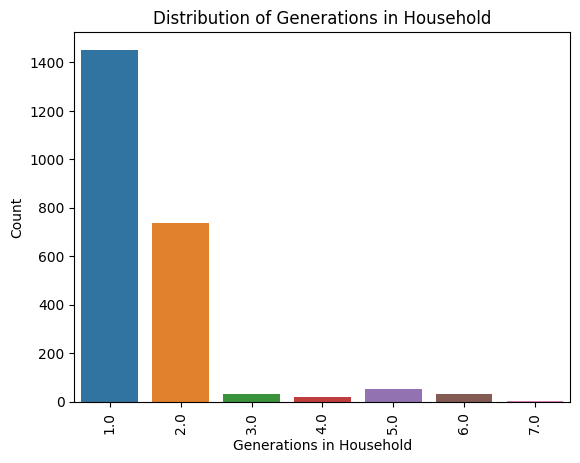

In [32]:
sns.countplot(x='FAMGEN', data=df)
plt.xlabel('Generations in Household')
plt.ylabel('Count')
plt.title('Distribution of Generations in Household')
plt.xticks(rotation=90)
plt.show()

Most of the respondents, regardless of religions, have 1 generation in their household.

In [36]:
#Adding legend mappings
famgen_legend = {
    1: 'One generation',
    2: 'Two generations, children',
    3: 'Two generations, parents',
    4: 'Two generations, grandchildren',
    5: 'Three generations, grandchildren',
    6: 'Three generations, children, parents',
    7: 'Four generations'
}

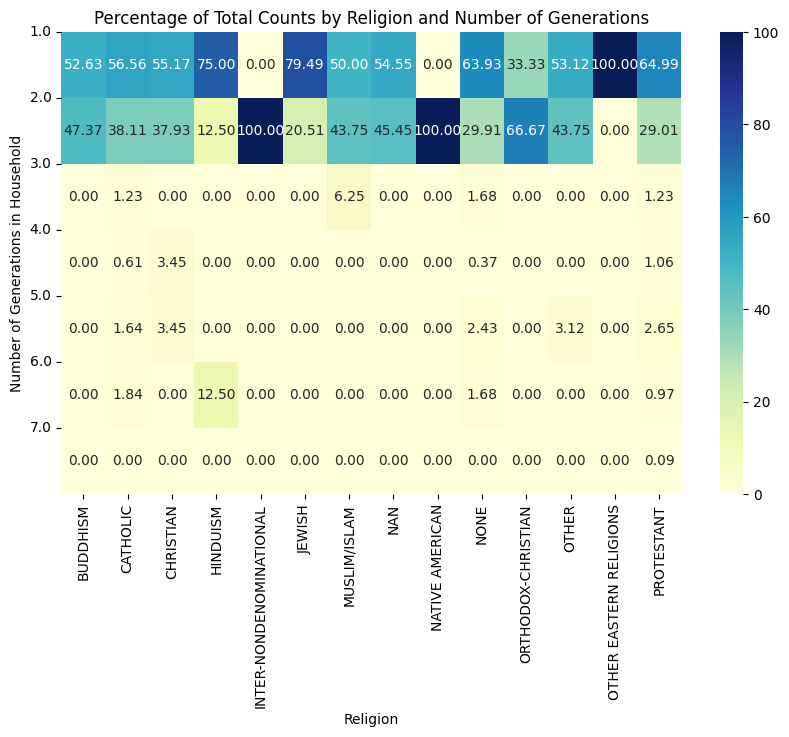

In [47]:
# Create a heatmap of the cross-tabulation table with percentages
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_percentage, annot=True, cmap='YlGnBu', cbar=True, fmt=".2f")
plt.xlabel('Religion')
plt.ylabel('Number of Generations in Household')
plt.title('Percentage of Total Counts by Religion and Number of Generations')
# Adjust x-tick positions to align with columns in the heatmap
plt.xticks(ticks=[tick + 0.5 for tick in range(len(cross_tab_percentage.columns))],
           labels=cross_tab_percentage.columns, rotation=90)
plt.yticks(ticks=range(len(cross_tab_percentage.index)), labels=cross_tab_percentage.index, rotation=0)
plt.show()

Visual representation of cross-tab above.

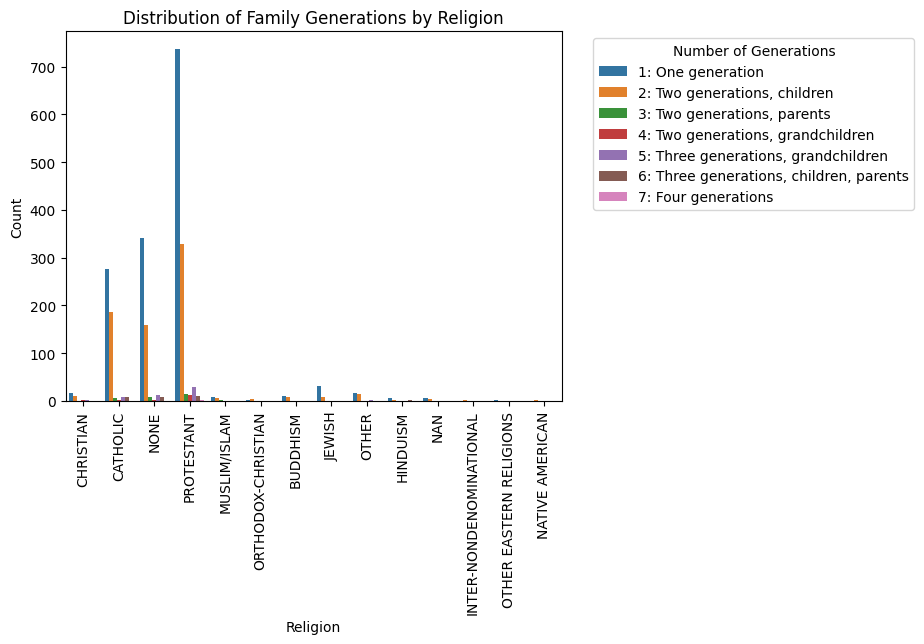

In [45]:
sns_plot = sns.countplot(x='RELIG', hue='FAMGEN', data=df)
plt.xlabel('Religion')
plt.ylabel('Count')
plt.title('Distribution of Family Generations by Religion')

# Add a legend for FAMGEN values
legend_labels = [f"{value}: {description}" for value, description in famgen_legend.items()]
plt.legend(title='Number of Generations', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust x-tick positions to align with columns in the heatmap
plt.xticks(rotation=90)
plt.show()

Most religions have one generation. Protestants have more disribution of generations in the household.

**Overall results for religion vs. family generations**

Most religions have one family generation living in their household, with Protestants, Catholics, and Christians having the greatest distribution. These religions have observations that have various numbers of generations in the household - this might be because of the many more observations these religions hold in the dataset. I was surprised that there weren't more religions with multiple generations in the household, as that is typically something I would expect.